In [67]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import imdb

In [68]:
#获取数据
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)  #num_words保留训练数据中前10000个最常出现的单词 低频舍弃

In [109]:
#显示
train_data    #(25000,)
train_labels  #(25000,)  1 or 0
test_data     #(25000,)
test_labels   #(25000)   1 or 0

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [110]:
word_index=imdb.get_word_index()

In [111]:
#获取对应的单词索引
reverse_word_index=dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review=' '.join(
    [reverse_word_index.get(i-3 , '?') for i in train_data[0]])

In [112]:
#显示
reverse_word_index
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [113]:
#将sequences进行one-hot编码
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [114]:
#将sample转换为向量形式，以便传入网络
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [115]:
#显示shape
train_data[0]
x_train[0]
train_labels[0]
y_train[0]
train_data.shape  #(25000,)
x_train.shape   #(25000,10000)
x_train[0]  # (10000,)

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [116]:
#构建网络模型
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [117]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [118]:
#配置优化器
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [119]:
#自定义的损失和指标
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [120]:
#在训练中监控模型在未出现的数据上的精度
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [121]:
#训练
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics=['acc']) 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.5937 - acc: 0.7032 - val_loss: 0.5054 - val_acc: 0.8146
Epoch 2/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.4139 - acc: 0.8823 - val_loss: 0.3789 - val_acc: 0.8813
Epoch 3/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.3002 - acc: 0.9171 - val_loss: 0.3225 - val_acc: 0.8826
Epoch 4/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.2286 - acc: 0.9341 - val_loss: 0.3194 - val_acc: 0.8732
Epoch 5/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1817 - acc: 0.9470 - val_loss: 0.2957 - val_acc: 0.8824
Epoch 6/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1489 - acc: 0.9557 - val_loss: 0.2910 - val_acc: 0.8851
Epoch 7/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1262 - acc: 0.9641 - val_loss: 0.2893 - 

In [122]:
#训练数据
history_dict = history.history #字典格式
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

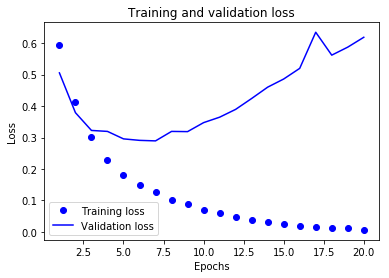

In [123]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

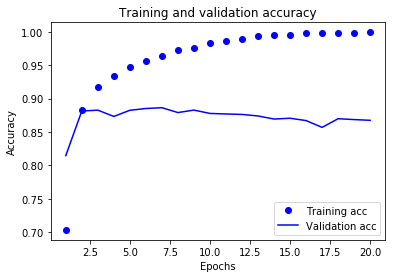

In [124]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [125]:
#上图可以看出过拟合
#从头训练个模型
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.5328 - acc: 0.7498
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.3128 - acc: 0.9056
Epoch 3/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.2211 - acc: 0.9287
Epoch 4/4
25000/25000 [==============================] - 2s 88us/step


In [126]:
results

[0.28961155114173887, 0.88460000000000005]

In [127]:
model.predict(x_test)

array([[ 0.16025566],
       [ 0.99163437],
       [ 0.71316183],
       ..., 
       [ 0.15016936],
       [ 0.08396918],
       [ 0.49808428]], dtype=float32)

In [128]:
#进一步实验，增加一层网络试试
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.4645 - acc: 0.8117
Epoch 2/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.2571 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.1940 - acc: 0.9294
Epoch 4/4
25000/25000 [==============================] - 2s 76us/step


In [129]:
results

[0.31947590095520018, 0.87551999999999996]

In [ ]:
 #结果更差了   可以考虑隐藏层个数  隐藏单元  loss function  激活函数等等